# MLP

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mnist as mnist
from hgen import write_model

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline

Using TensorFlow backend.


In [2]:
from numpy.random import seed
from tensorflow import set_random_seed
seed(1)
set_random_seed(2)

In [29]:
# Reshape image data so each image is represented by one long array 
def prepare_input(arr):
    arr = arr.reshape(arr.shape[0], arr.shape[1] * arr.shape[2])
    
    # Convert to input float32
    arr = arr.astype('float32')

    # Normalise input in the range [-1, 1] 
    arr = (arr-127.5) / 127.5

    return arr

def mem_usage(numpy_arr):
    print('Uses {0:.2f} MB of memory'.format(numpy_arr.nbytes / 1024 / 1024))

def select_ten_digits(labels):
    image_indices = []
    for number in range(10):
        # Find indicies where elements equal to a specific number
        indices = np.where(labels == number)[0]
        rnd_idx = np.random.choice(indices, 1)[0]
        image_indices.append(rnd_idx)
    return image_indices

def plot_ten_digits(images, indices):
    num_rows = 2
    num_columns = 5
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(10, 3))
    for row in range(num_rows):
        for column in range(num_columns):
            img = images[indices[column + (row*num_columns)]]
            axes[row][column].imshow(img, cmap='binary')

In [15]:
X_original = mnist.train_images()
y_original = mnist.train_labels()
X_test_original = mnist.test_images()
y_test_original = mnist.test_labels()

In [23]:
ten_indices = select_ten_digits(y_test_original)
ten_indices

[5965, 5090, 9700, 7479, 5032, 5285, 9058, 1366, 4112, 73]

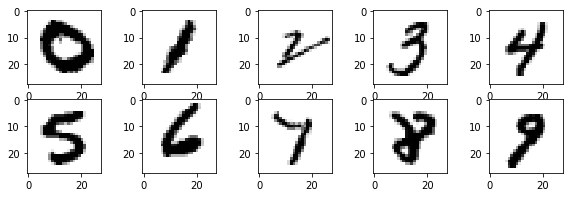

In [30]:
plot_ten_digits(X_test_original, ten_indices)

In [8]:
# Reshape and normalise input
X = prepare_input(X_original)
X_test = prepare_input(X_test_original)

In [17]:
ten_indices

[7791, 4507, 3384, 9063, 4598, 2743, 5286, 6589, 9496, 4078]

In [5]:
num_classes = np.unique(y).shape[0]
input_size = X.shape[1]

# Convert class vectors to binary class matrices
y = keras.utils.to_categorical(y_original, num_classes)
y_test = keras.utils.to_categorical(y_test_original, num_classes)

In [6]:
def train(model, model_name='model'):
    model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=['accuracy'])
    history = model.fit(X, y,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test, y_test))
    model.save_weights('models/{}.hdf5'.format(model_name))

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

def create_mlp_3_layers_32():
    inputs = Input(shape=(input_size,))
    x = Dense(32, name='hidden', activation='relu')(inputs)
    predictions = Dense(10, name='output', activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return { 'model': model, 'name': 'mpl_3_layers_32' }

mpl_3_layers_32 = create_mlp_3_layers_32()
mpl_3_layers_32_model = mpl_3_layers_32['model']
mpl_3_layers_32_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 32)                25120     
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


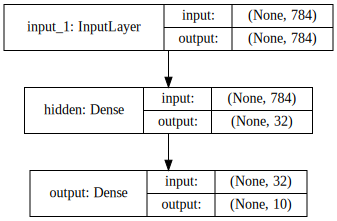

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(mpl_3_layers_32_model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
train(mpl_3_layers_32['model'], mpl_3_layers_32['name'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.4753 - acc: 0.8551 - val_loss: 0.2936 - val_acc: 0.9145
Epoch 2/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2856 - acc: 0.9160 - val_loss: 0.2588 - val_acc: 0.9222
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2425 - acc: 0.9295 - val_loss: 0.2196 - val_acc: 0.9347
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2171 - acc: 0.9360 - val_loss: 0.2084 - val_acc: 0.9397
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2009 - acc: 0.9411 - val_loss: 0.2285 - val_acc: 0.9337
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1883 - acc: 0.9451 - val_loss: 0.1866 - val_acc: 0.9465
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.1770 - acc: 0.9486 - val_loss: 0.1806 - val_acc

In [10]:
write_model(mpl_3_layers_32_model, 'nn_3_layers_32_neurons.h')

In [11]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [11]:
x = X_test[0]
x = np.expand_dims(x, axis=0)
x

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1. 

In [12]:
y_pred = mpl_3_layers_32_model.predict(x)

In [13]:
for i in range(len(y_pred[0])):
    res = y_pred[0][i]
    print('ASSERT_EQ_FLOAT({0:.9f}, result[{1}]);'.format(res, i))

ASSERT_EQ_FLOAT(0.000001091, result[0]);
ASSERT_EQ_FLOAT(0.000000000, result[1]);
ASSERT_EQ_FLOAT(0.000027445, result[2]);
ASSERT_EQ_FLOAT(0.000085699, result[3]);
ASSERT_EQ_FLOAT(0.000000000, result[4]);
ASSERT_EQ_FLOAT(0.000000037, result[5]);
ASSERT_EQ_FLOAT(0.000000000, result[6]);
ASSERT_EQ_FLOAT(0.999881625, result[7]);
ASSERT_EQ_FLOAT(0.000003256, result[8]);
ASSERT_EQ_FLOAT(0.000000857, result[9]);
